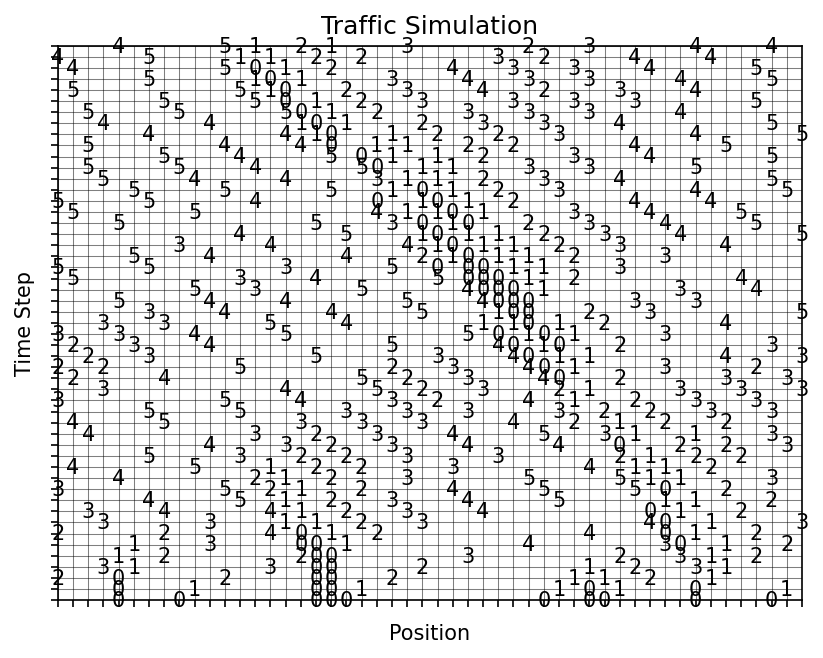

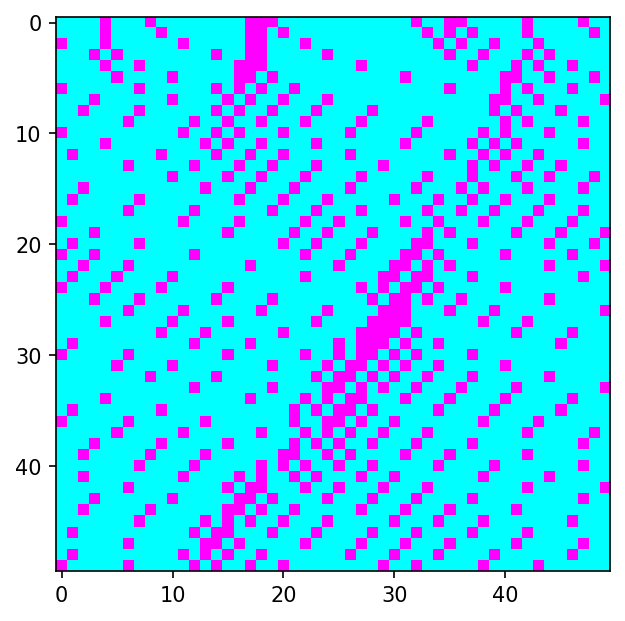

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import random

def Nagel_Schreckenberg(L, N, v_max, p, t_max):
    import random
    positions = N*[0] + (L-N)*[-1]
    random.shuffle(positions)
    positions = [positions]
    for t in range(t_max):
        previous, current = positions[-1], L * [-1]
        for pos in range(L):
            if previous[pos] > -1:
                d = 1
                vi = previous[pos]
                while previous[(pos + d) % L] < 0: #Check how many spaces ahead are free
                    d += 1
                vtemp = min(vi + 1, d - 1, v_max) #Accelerating
                if random.uniform(0,1) < p: #Braking
                    v = max(vtemp-1, 0)
                else:
                    v = vtemp
                current[(pos+v)%L] = v #Moving
        positions.append(current)
    return positions



def plot_simulation(simulation):
    timesteps, L = len(simulation), len(simulation[0])
    a = np.empty(shape=(timesteps, L), dtype=object)

    for i in range(L):
        for j in range(timesteps):
            a[j, i] = str(int(simulation[j][i])) if simulation[j][i] > -1 else ''

    fig, ax = plt.subplots(dpi=150)
    ax.set_xticks(np.arange(L))
    ax.set_yticks(np.arange(timesteps))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for i in range(timesteps):
        for j in range(L):
            text = ax.text(j, i, a[i, j], ha="center", va="center")

    plt.xlabel('Position')
    plt.ylabel('Time Step')
    plt.title('Traffic Simulation')
    plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.show()

tmax = 50
L = 50
N = 10
vmax = 5
p = 0.2

simulation = Nagel_Schreckenberg(L, N, vmax, p, tmax)
plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()